In [10]:
%%time

# Instalación de bibliotecas seleccionadas:-
from gc import collect;  # recolección de basura para liberar memoria
from warnings import filterwarnings;  # manejo de mensajes de advertencia

import re  # expresiones regulares

import numpy as np  # álgebra lineal
import pandas as pd  # procesamiento de datos, archivos CSV (ej. pd.read_csv)
from scipy import stats  # funciones estadísticas

from itertools import cycle, combinations  # generación de combinaciones y ciclos

import matplotlib.pyplot as plt  # visualización de datos
from matplotlib.ticker import FuncFormatter  # Para formato personalizado de marcas
from matplotlib.ticker import FormatStrFormatter  # Para formatear marcas con cadenas
from mpl_toolkits.mplot3d import Axes3D  # Módulo para ejes 3D
from matplotlib.colors import ListedColormap  # Mapa de colores para gráficos de dispersión
import seaborn as sns  # visualización estadística de datos
from wordcloud import WordCloud  # Biblioteca para visualización de datos textuales

from io import StringIO

filterwarnings('ignore');  # Ignorar mensajes de advertencia
from IPython.display import display, HTML, display_html, clear_output;  # mostrar contenido HTML


clear_output();
print();
collect();


CPU times: total: 78.1 ms
Wall time: 123 ms


In [2]:
# Definición de la clase 'color' para aplicar estilos de color en la terminal
class color:
    GREEN = '\033[92m'  # Código ANSI para texto en color verde
    END = '\033[0m'     # Código ANSI para reiniciar el color al valor por defecto

# Configuración del estilo visual para gráficos con matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  # Estilo gráfico inspirado en la revista FiveThirtyEight

# Configuración del tamaño por defecto para las figuras generadas con seaborn
import seaborn as sns
sns.set(rc={"figure.figsize": (10, 10)})  # Define tamaño de las figuras como 10x10 pulgadas

# Mensaje de confirmación 
print(f"{color.GREEN}Successfully Configured libraries!{color.END}")


Successfully Configured libraries!


In [3]:
df = pd.read_csv('salaries.csv') # Transformamos en CSV

## Paso 2 | Cargar conjunto de datos

In [12]:
%%time
# %%time mide el tiempo de ejecución de todo el bloque (solo en notebooks Jupyter)

# Intento de cargar el archivo CSV en un DataFrame
try:
    df = pd.read_csv('salaries.csv')  # Carga el archivo 'salaries.csv'
    print(f"\033[92mDataset loaded successfully.\033[0m")  # Mensaje en verde si fue exitoso

# Si el archivo no se encuentra, muestra mensaje de error en rojo
except FileNotFoundError:
    print(f"\033[91mError: File not found. Please check the file path.\033[0m")

# Captura y muestra cualquier otro tipo de error
except Exception as e:
    print(f"\033[91mAn error occurred while loading the dataset: {e}\033[0m")

# Estética: cambia el color del texto a azul antes de ejecutar collect()
print("\033[94m")

# Limpieza de memoria (garbage collection)
collect()

Dataset loaded successfully.

CPU times: total: 203 ms
Wall time: 207 ms


170

### Paso 3 | Descripción general de atributos

In [54]:

def display_dataframe_with_custom_header(df, show_head=False):
    """
    Muestra información de un DataFrame o sus primeras filas.

    Parámetros:
    df (pandas.DataFrame): El DataFrame a mostrar.
    show_head (bool): Si es True, muestra las primeras filas con head().
                      Si es False, muestra información general con info().
    """
    if show_head:
        display(df.head())  # Muestra las primeras filas del DataFrame
    else:
        display(df.info())  # Muestra información general del DataFrame

display_dataframe_with_custom_header(df)  # Muestra info general del DataFrame
display_dataframe_with_custom_header(df, show_head=True)  # Muestra las primeras filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73158 entries, 0 to 73157
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73157 non-null  float64
 1   experience_level    73156 non-null  object 
 2   employment_type     73157 non-null  object 
 3   job_title           73154 non-null  object 
 4   salary              73156 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73154 non-null  float64
 7   employee_residence  73156 non-null  object 
 8   remote_ratio        73152 non-null  float64
 9   company_location    73156 non-null  object 
 10  company_size        73156 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


None

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
4,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M


### Paso 4 | Manejo de valores faltantes

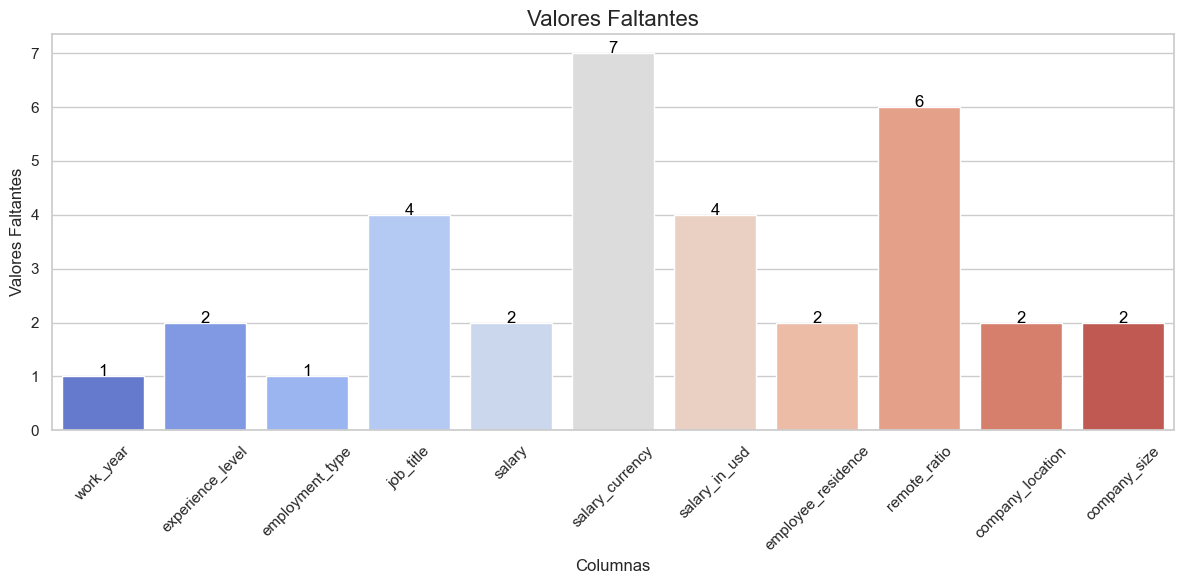

In [15]:
# Calcular la cantidad de valores faltantes por columna
missing_values = df.isnull().sum()  # Cuenta valores NaN por columna

# Crear un nuevo DataFrame con los resultados
missing_df = pd.DataFrame({
    'Columnas': missing_values.index,                # Nombres de columnas
    'Valores Faltantes': missing_values.values       # Cantidad de valores faltantes
})

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))  # Ancho x Alto en pulgadas

# Estilo visual de seaborn
sns.set_style("whitegrid")  # Fondo blanco con líneas de cuadrícula

# Crear un gráfico de barras para visualizar los valores faltantes
barplot = sns.barplot(
    x="Columnas", 
    y="Valores Faltantes", 
    data=missing_df,
    palette="coolwarm"  # Paleta de color cambiada (antes: "copper")
)

# Mostrar el número exacto de valores faltantes sobre cada barra
for index, row in missing_df.iterrows():
    barplot.text(index, row["Valores Faltantes"], int(row["Valores Faltantes"]), color='black', ha="center")

# Título y ajustes finales
plt.title("Valores Faltantes", fontsize=16)  # Título del gráfico
plt.xticks(rotation=45)                      # Rotar etiquetas del eje X para mejor lectura
plt.tight_layout()                           # Ajustar automáticamente márgenes
plt.show()                                   # Mostrar el gráfico


###  Paso 5 | Gestión de valores duplicados

In [9]:
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 39124 duplicate values


In [13]:
def apply_duplicated_styling(df):
    
    # Define a function to apply font size and color to values
    def apply_style(value):
        if value:
            return 'font-size: 20px; color: red'
        else:
            return 'font-size: 20px; color: green'

    # Define a function to apply font size to column names
    def apply_column_name_style(value):
        return 'font-size: 20px'

    # Transpose the DataFrame and check for duplicated values along the rows
    column_duplicates = df.T.duplicated()

    # Apply styling to the DataFrame containing duplicated values
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Apply styling to the column names
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '20px')]}])

    return styled_column_duplicates

In [14]:
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


### PASO 6: Datos estadisticos

In [19]:
def calculate_statistics(df, opacity=0.4, font_size='14px'):
    # Seleccionar sólo columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])
    
    # # Calcular estadísticas solo para columnas numéricas
    stats = pd.DataFrame({
        'Mean': numeric_df.mean(),
        'Median': numeric_df.median(),
        'Mode': numeric_df.mode().iloc[0],
        'Range': numeric_df.max() - numeric_df.min(),
        'Stdev': numeric_df.std(),
        'Variance': numeric_df.var(),
        'IQR': numeric_df.quantile(0.75) - numeric_df.quantile(0.25),
        '25%': numeric_df.quantile(0.25),
        '50%': numeric_df.quantile(0.5),
        '75%': numeric_df.quantile(0.75),
        'Min': numeric_df.min(),
        'Max': numeric_df.max(),
        'Skewness': numeric_df.skew(),
        'Kurtosis': numeric_df.kurtosis()
    }).T

    # Se le da estilos
    styled_stats = stats.style.set_properties(**{
        'background-color': f'rgba(173, 216, 230, {opacity})',
        'font-size': font_size,
        'text-align': 'center'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', 'white'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid #bbb')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom'), ('font-size', '16px'), ('color', '#555')]}
    ]).set_caption("Estadísticas Descriptivas por Columna")

    return styled_stats


In [20]:
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.831376,162552.859082,158007.350029,21.581775
Median,2024.000000,148000.000000,147500.000000,0.000000
Mode,2024.000000,160000.000000,160000.000000,0.000000
Range,6.000000,30386000.000000,785000.000000,100.000000
Stdev,0.478270,192567.285763,72501.773763,41.022240
Variance,0.228742,37082159546.103737,5256507198.738956,1682.824197
IQR,0.000000,93075.750000,92825.000000,0.000000
25%,2024.000000,106924.250000,106875.000000,0.000000
50%,2024.000000,148000.000000,147500.000000,0.000000
75%,2024.000000,200000.000000,199700.000000,0.000000


In [21]:
def variable_summary(df):
    # Crear un DataFrame resumen de las variables
    summary = pd.DataFrame({
        'Variable': df.columns,              # Nombre de cada columna
        'Dtype': df.dtypes.values,           # Tipo de dato de cada columna
        'Count': [len(df)] * len(df.columns),# Total de filas (igual para todas las columnas)
        'Unique': df.nunique().values,       # Cantidad de valores únicos por columna
        'Missing': df.isnull().sum().values  # Cantidad de valores faltantes por columna
    })
    
    # Aplicar estilo al DataFrame para visualización amigable
    styled = summary.style \
        .set_properties(**{
            'text-align': 'left',            # Alinear texto a la izquierda
            'font-size': '12px',             # Tamaño de fuente
            'border': '1px solid #e0e0e0',   # Borde para celdas
            'padding': '4px 8px'             # Espaciado interno
        }) \
        .set_table_styles([
            {'selector': 'th',               # Estilo para encabezados
             'props': [
                 ('background-color', '#f8f9fa'),
                 ('color', '#202124'),
                 ('font-weight', 'bold'),
                 ('border', '1px solid #e0e0e0'),
                 ('padding', '8px 16px')
             ]},
            {'selector': 'td',               # Estilo para celdas normales
             'props': [
                 ('border', '1px solid #e0e0e0'),
                 ('padding', '8px 16px')
             ]},
            {'selector': 'tr:hover',         # Efecto hover sobre filas
             'props': [
                 ('background-color', '#f1f3f4')
             ]}
        ]) \
        .hide(axis='index')  # Ocultar el índice del DataFrame
    
    return styled  # Retorna el DataFrame con estilo aplicado

# Llamar a la función con tu DataFrame para mostrar el resumen de variables
summary_df = variable_summary(df)
summary_df  # Muestra el resumen estilizado


Variable,Dtype,Count,Unique,Missing
work_year,float64,73158,7,1
experience_level,object,73158,4,2
employment_type,object,73158,4,1
job_title,object,73158,292,4
salary,float64,73158,7095,2
salary_currency,object,73158,25,7
salary_in_usd,float64,73158,7702,4
employee_residence,object,73158,93,2
remote_ratio,float64,73158,3,6
company_location,object,73158,87,2
